<a href="https://colab.research.google.com/github/atmdatascience/python/blob/main/colab/Analisis_v01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

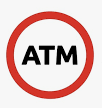

#Procesamiento del Lenguaje Natural - NLP - Análisis de sentimiento

## Modulos

In [1]:
import pandas as pd
import numpy as np

## Fuente de datos

In [2]:
url = "https://raw.githubusercontent.com/atmdatascience/python/main/datasets/encuestasweb/"

In [3]:
archivo = "Encuestas-2021-Tramite-web.csv"

In [4]:
ingles = "encuesta.xlsx.csv"

## Creación del dataframe

In [5]:
encuesta = pd.read_csv(url+archivo)

## Visualización del dataframe

In [6]:
encuesta

,Unnamed: 0,Marca temporal,1. Utiliza habitualmente la página web de ATM,2. Le resultó simple la creación de su cuenta en Mis Trámites,3. Le resulta comprensible la sección de Mis Trámites,4. El trámite que realizó dentro de Mis Trámites fue resuelto de forma:,5. La información brindada por la página web de ATM es:,6. El boleto para pagar el año 2021 lo obtiene por:,Agregue aquí su sugerencia
0,1,3/02/2021 9:49:57,SI,SI,SI,Muy satisfactoria,Muy Buena,Descarga de la página web de ATM,"La unica sugerencia, es un poco mas de celerid..."
1,2,3/02/2021 9:54:50,SI,SI,SI,Muy satisfactoria,Buena,Descarga de la página web de ATM,NaN
2,3,3/02/2021 10:02:35,SI,SI,SI,Satisfactoria,Buena,Descarga de la página web de ATM,NaN
3,4,3/02/2021 10:11:57,SI,NO,NO,Nada satisfactoria,Mala,Descarga de la página web de ATM,"Llevo 90 minutos al teléfono y nadie atiende, ..."
4,5,3/02/2021 10:32:10,SI,SI,SI,Satisfactoria,Buena,Descarga de la página web de ATM,NaN
...,...,...,...,...,...,...,...,...,...
2698,2699,10/06/2021 11:24:36,SI,SI,SI,Muy satisfactoria,Muy Buena,Descarga de la página web de ATM,no tengo sugerencias
2699,2700,10/06/2021 12:48:40,NO,SI,SI,Satisfactoria,Buena,Recepción por correo electrónico,NaN
2700,2701,10/06/2021 12:52:42,SI,SI,SI,Satisfactoria,Buena,Descarga de la página web de ATM,Debería tener una forma de acceder a Resolucio...
2701,2702,10/06/2021 13:13:35,SI,SI,SI,Satisfactoria,Buena,Descarga de la página web de ATM,NaN


In [7]:
encuesta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2703 entries, 0 to 2702
Data columns (total 9 columns):
 #   Column                                                                   Non-Null Count  Dtype 
---  ------                                                                   --------------  ----- 
 0   Unnamed: 0                                                               2703 non-null   int64 
 1   Marca temporal                                                           2703 non-null   object
 2   1. Utiliza habitualmente la página web de ATM                            2703 non-null   object
 3   2. Le resultó simple la creación de su cuenta en Mis Trámites            2703 non-null   object
 4   3. Le resulta comprensible la sección de Mis Trámites                    2703 non-null   object
 5   4. El trámite que realizó dentro de Mis Trámites fue resuelto de forma:  2703 non-null   object
 6   5. La información brindada por la página web de ATM es:                  2693 non

## Limpieza y transformación de datos

In [8]:
encuesta.rename(columns={"Unnamed: 0":"numero"}, inplace=True) # "Unnamed: 0"
encuesta.rename(columns={"Marca temporal":"fecha"}, inplace=True) # "Marca temporal"
encuesta.rename(columns={"1. Utiliza habitualmente la página web de ATM":"P1"}, inplace=True) # "1. Utiliza habitualmente la página web de ATM"
encuesta.rename(columns={"2. Le resultó simple la creación de su cuenta en Mis Trámites":"P2"}, inplace=True) # "2. Le resultó simple la creación de su cuenta en Mis Trámites""
encuesta.rename(columns={"3. Le resulta comprensible la sección de Mis Trámites":"P3"}, inplace=True) # "3. Le resulta comprensible la sección de Mis Trámites"
encuesta.rename(columns={"4. El trámite que realizó dentro de Mis Trámites fue resuelto de forma:":"P4"}, inplace=True) # "4. El trámite que realizó dentro de Mis Trámites fue resuelto de forma:"
encuesta.rename(columns={"5. La información brindada por la página web de ATM es:":"P5"}, inplace=True) # "5. La información brindada por la página web de ATM es:"
encuesta.rename(columns={"6. El boleto para pagar el año 2021 lo obtiene por:":"P6"}, inplace=True) # "6. El boleto para pagar el año 2021 lo obtiene por:"
encuesta.rename(columns={"Agregue aquí su sugerencia":"P7"}, inplace=True) # "Agregue aquí su sugerencia"

In [9]:
encuesta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2703 entries, 0 to 2702
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   numero  2703 non-null   int64 
 1   fecha   2703 non-null   object
 2   P1      2703 non-null   object
 3   P2      2703 non-null   object
 4   P3      2703 non-null   object
 5   P4      2703 non-null   object
 6   P5      2693 non-null   object
 7   P6      2703 non-null   object
 8   P7      951 non-null    object
dtypes: int64(1), object(8)
memory usage: 190.2+ KB


## Clonando el dataframe

Vamos a clonar el dataframe para luego dejar solo la columna que nos interesa que es la que contiene las encuestas..

In [10]:
texto = encuesta.copy(deep=False)

In [11]:
texto = texto.drop(columns=["numero","fecha","P1","P2","P3","P4","P5","P6"], axis=1)

In [12]:
texto = texto.dropna(how="any")

In [13]:
texto = texto.reset_index()
texto

,index,P7
0,0,"La unica sugerencia, es un poco mas de celerid..."
1,3,"Llevo 90 minutos al teléfono y nadie atiende, ..."
2,8,ES IMPOSIBLE COMUNICARSE CON USTEDES Y RESOLVE...
3,15,Nunca atienden en el 148 ni contestan de maner...
4,18,Mejorar tiempos de respuesta de los trámites s...
...,...,...
946,2691,El pago del impuesto inmobiliario no coincide ...
947,2694,Deberían referirse a formularios e informes c...
948,2696,Que se puedan descargar las constancias de ATM...
949,2698,no tengo sugerencias


In [14]:
texto = texto.drop(columns=["index"], axis=1)
texto

,P7
0,"La unica sugerencia, es un poco mas de celerid..."
1,"Llevo 90 minutos al teléfono y nadie atiende, ..."
2,ES IMPOSIBLE COMUNICARSE CON USTEDES Y RESOLVE...
3,Nunca atienden en el 148 ni contestan de maner...
4,Mejorar tiempos de respuesta de los trámites s...
...,...
946,El pago del impuesto inmobiliario no coincide ...
947,Deberían referirse a formularios e informes c...
948,Que se puedan descargar las constancias de ATM...
949,no tengo sugerencias


## Convirtiendo el texto en minuscula

In [15]:
texto.P7 = texto.P7.astype(str).str.lower()
texto

,P7
0,"la unica sugerencia, es un poco mas de celerid..."
1,"llevo 90 minutos al teléfono y nadie atiende, ..."
2,es imposible comunicarse con ustedes y resolve...
3,nunca atienden en el 148 ni contestan de maner...
4,mejorar tiempos de respuesta de los trámites s...
...,...
946,el pago del impuesto inmobiliario no coincide ...
947,deberían referirse a formularios e informes c...
948,que se puedan descargar las constancias de atm...
949,no tengo sugerencias


## Eliminando acentos y simbolos de puntuación

In [16]:
texto.P7 = texto.P7.astype(str).str.replace("á","a")
texto.P7 = texto.P7.astype(str).str.replace("é","e")
texto.P7 = texto.P7.astype(str).str.replace("í","i")
texto.P7 = texto.P7.astype(str).str.replace("ó","o")
texto.P7 = texto.P7.astype(str).str.replace("ú","u")
texto.P7 = texto.P7.astype(str).str.replace("ü","u")
texto.P7 = texto.P7.astype(str).str.replace(",","")
texto.P7 = texto.P7.astype(str).str.replace(";","")
texto.P7 = texto.P7.astype(str).str.replace(":","")
texto.P7 = texto.P7.astype(str).str.replace(".","")
texto.P7 = texto.P7.astype(str).str.replace("!","")
texto.P7 = texto.P7.astype(str).str.replace("(","")
texto.P7 = texto.P7.astype(str).str.replace(")","")
texto.P7 = texto.P7.astype(str).str.replace('"',"")
texto

,P7
0,la unica sugerencia es un poco mas de celerida...
1,llevo 90 minutos al telefono y nadie atiende p...
2,es imposible comunicarse con ustedes y resolve...
3,nunca atienden en el 148 ni contestan de maner...
4,mejorar tiempos de respuesta de los tramites s...
...,...
946,el pago del impuesto inmobiliario no coincide ...
947,deberian referirse a formularios e informes c...
948,que se puedan descargar las constancias de atm...
949,no tengo sugerencias


## Traduccion al Ingles

In [17]:
texto.to_excel("/content/drive/MyDrive/encuesta.xlsx")

In [18]:
textoingles = pd.read_csv(url+ingles)
textoingles

,P7,ingles
0,la unica sugerencia es un poco mas de celerida...,The only suggestion is a bit more celerity in ...
1,llevo 90 minutos al telefono y nadie atiende p...,I have 90 minutes to the phone and nobody atte...
2,es imposible comunicarse con ustedes y resolve...,It is impossible to communicate with you and s...
3,nunca atienden en el 148 ni contestan de maner...,They never attend at 148 or quickly answer ele...
4,mejorar tiempos de respuesta de los tramites s...,Improve times of response from the requested p...
...,...,...
939,el pago del impuesto inmobiliario no coincide ...,The payment of the real estate tax does not ma...
940,deberian referirse a formularios e informes c...,They should refer to forms and reports with th...
941,que se puedan descargar las constancias de atm...,that the ATM records can be downloaded without...
942,no tengo sugerencias,I do not have suggestions


## Modulo bloques de texto

In [19]:
import textblob as tb

In [20]:
from textblob import TextBlob

## Modulo expresiones regulares

In [21]:
import re

## Función análisis de sentimiento

In [22]:
def obtener_sentimentiento(dataframe, columna):
    texto_columna = dataframe[columna]
    bloques_sentimiento = texto_columna.apply(TextBlob)
    valores_sentimiento = [{"Polaridad": v.sentiment.polarity,"Subjectividad": v.sentiment.subjectivity}
        for v in bloques_sentimiento.values]
    return pd.DataFrame(valores_sentimiento)

In [23]:
sentimiento = obtener_sentimentiento(textoingles,"ingles")

In [24]:
sentimiento

,Polaridad,Subjectividad
0,0.250000,0.750
1,0.000000,0.000
2,-0.666667,1.000
3,0.333333,0.500
4,0.000000,0.000
...,...,...
939,0.100000,0.200
940,-0.500000,1.000
941,0.000000,1.000
942,0.000000,0.000


In [25]:
sentimiento_ATM = pd.concat([textoingles, sentimiento], axis=1)

In [26]:
sentimiento_ATM.head()

,P7,ingles,Polaridad,Subjectividad
0,la unica sugerencia es un poco mas de celerida...,The only suggestion is a bit more celerity in ...,0.250000,0.75
1,llevo 90 minutos al telefono y nadie atiende p...,I have 90 minutes to the phone and nobody atte...,0.000000,0.00
2,es imposible comunicarse con ustedes y resolve...,It is impossible to communicate with you and s...,-0.666667,1.00
3,nunca atienden en el 148 ni contestan de maner...,They never attend at 148 or quickly answer ele...,0.333333,0.50
4,mejorar tiempos de respuesta de los tramites s...,Improve times of response from the requested p...,0.000000,0.00


In [27]:
sentimiento_positivo = sentimiento_ATM[sentimiento_ATM.Polaridad > 0.15]
sentimiento_negativo = sentimiento_ATM[sentimiento_ATM.Polaridad <= -0.15]
sentimiento_neutral = sentimiento_ATM[(sentimiento_ATM.Polaridad > -0.1) & (sentimiento_ATM.Polaridad < 0.1)]

In [28]:
sentimiento_positivo.head(10)

,P7,ingles,Polaridad,Subjectividad
0,la unica sugerencia es un poco mas de celerida...,The only suggestion is a bit more celerity in ...,0.250000,0.750000
3,nunca atienden en el 148 ni contestan de maner...,They never attend at 148 or quickly answer ele...,0.333333,0.500000
11,no responde en forma rapida los email y no ati...,does not respond quickly emails and do not att...,0.333333,0.500000
23,muchas gracias por permitirme hacer el tramite...,Thank you very much for allowing me to do the ...,0.260000,0.260000
26,si serian tan amables de resolver un poco mas ...,if they would be so kind to solve a little fas...,0.203125,0.675000
31,la respuesta de tramites normales y simples de...,The response of normal and simple procedures s...,0.283333,0.568095
32,mayor rapedez en la pagina - lo demas ok,greater rapedez on the page - the rest ok,0.500000,0.500000
35,espero me resuelvan el problema muchas gracias,I hope I solve the problem thank you very much,0.260000,0.260000
36,creo que la pagina esta muy buena solo que no ...,I think the page is very good only that I do n...,0.250648,0.679259
37,tal vez mas informacion para los tramites online,Perhaps more information for online procedures,0.500000,0.500000


In [29]:
sentimiento_positivo.shape

(335, 4)

In [30]:
sentimiento_negativo.head(10)

,P7,ingles,Polaridad,Subjectividad
2,es imposible comunicarse con ustedes y resolve...,It is impossible to communicate with you and s...,-0.666667,1.000000
27,en algun tramite la pagina es un poco complicada,in some procedure the page is a bit complicated,-0.500000,1.000000
44,ultimamente esta mucho tiempo en mantenimiento...,lately this time in maintenance the page espec...,-0.150000,0.800000
46,si bien el sistema de tramites online ha resue...,While the online processing system has solved ...,-0.390000,0.520000
54,muy costoso consegui las certificaciones,Very expensive I got the certifications,-0.650000,0.910000
61,es muy complejo realizar un reclamo por web y ...,It is very complex to make a web claim and als...,-0.390000,0.520000
63,menos demora en las respuestas y mas sencillo ...,Less delay in the answers and easier sealants,-0.166667,0.066667
65,es muy complejo e inentendible hacer seguimien...,It is very complex and inegitably monitoring p...,-0.390000,0.520000
68,nadie responde a las consultas no atienden el ...,Nobody responds to the consultations do not at...,-0.666667,1.000000
80,cuando trate de registrarme on line resulto im...,"When you try to register on Line, it turned ou...",-0.666667,1.000000


In [31]:
sentimiento_negativo.shape

(106, 4)

In [32]:
sentimiento_neutral.head(10)

,P7,ingles,Polaridad,Subjectividad
1,llevo 90 minutos al telefono y nadie atiende p...,I have 90 minutes to the phone and nobody atte...,0.000000,0.000000
4,mejorar tiempos de respuesta de los tramites s...,Improve times of response from the requested p...,0.000000,0.000000
5,mucha demora en resolver,A lot of delay in solving,0.000000,0.000000
6,mejorar los tramites digitales,Improve digital procedures,0.000000,0.000000
8,un desastre para personas mayores una verguenz...,A disaster for elderly a gauge embarrassment,0.000000,0.000000
9,es dificil al comienzo lleva horas para poder ...,It is difficult at the beginning it takes hour...,0.095238,0.720238
10,no pude tener repuesta de un expediente inicia...,I could not have a file of a file initiated on...,0.000000,0.000000
12,sugiero que el blanqueo de clave no sea con tr...,I suggest that the key laundering is not with ...,0.000000,1.000000
14,deberian especificar que tramite es on line o ...,they should specify that it is on line or face...,0.000000,0.000000
16,no entiendo por que motivo no atienden presenc...,I do not understand why reason they do not fac...,0.000000,0.300000


In [33]:
sentimiento_neutral.shape

(439, 4)